In [2]:
import scipy
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [10]:
#set the directory to the data file
current_dir = os.getcwd()
os.chdir('c:\\Users\\Melanie\\OneDrive - Rensselaer Polytechnic Institute\\Desktop\\School\\24_Spring\\MLE\\Project\\data')

segment_names = "FP1, FP2, FC5, FC6, FZ, T7, CZ, T8, P7, P3, PZ, P4, P8, O1, Oz, O2".split(", ")

files = os.listdir()

#getting the demographics both gets rid   
demographics = pd.read_csv(files.pop(0),names=["Isman","Age","Fatigue"])

In [4]:
def plot_signal(section_num, t, signal, class_bool, title_text, figtitle):
    colors = ["r","g"]
    n = np.shape(signal)[0]
    fig, axs = plt.subplots(nrows=n,figsize=(8,n*0.5))
    for i in range(n):
        #plotting the colors
        for j in range(1,int(max(section_num))):
            indices = np.where(section_num == j)
            class_boolean = int(class_bool[indices[0]][0])
            axs[i].plot(t[indices],signal[i][indices],colors[class_boolean%2])
            axs[i].set_ylabel(segment_names[i])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    fig.suptitle(title_text)
    plt.tight_layout()
    plt.savefig(figtitle,dpi=300)

In [5]:
def extract_segments(participant):
    """Gets just the segments where the subject is being tested
    Input:  participant - the file name
    Output: t           - 
            signal      -
            section_num -
            colors      - the graph colors """

    #get the signal
    signal = scipy.io.loadmat(participant)["SIGNAL"].T
    n,m = np.shape(signal)
    booleans = signal[-2:] #get the columns that show where is what

    #getting the starting indices. np.nonzero returns two arrays, one for the values,
    #and the other one for the locations. Using this I can already get the classes
    # and the indices
    indices = np.nonzero(booleans)
    sort_indices = np.argsort(indices[1])

    classes = indices[0][sort_indices]
    indices = indices[1][sort_indices]

    #now making two arrays, one for the section number and the other for the class boolean
    class_bool = np.zeros(m) 
    section_num = np.zeros(m)

    for (s_num,ind),cond in zip(enumerate(indices),classes):
        class_bool[ind:ind+5121] = cond+1
        section_num[ind:ind+5121] = s_num+1
    
    # choosing only the test condition times
    test_indices = np.where(section_num != 0)[0]
    trimmed_signal = signal.T[test_indices].T

    #splitting up the data
    t = np.array(list(range(len(test_indices))))*0.001953125
    signal = trimmed_signal[1:-2]
    section_num = section_num[test_indices]
    class_bool = class_bool[test_indices]

    #getting the participant number
    p_number = int(files[0].split(".")[0].split("_")[1])

    return t, signal, section_num, class_bool, p_number

In [24]:
def plot_all(participant, title_text, figtitle):
    signal = scipy.io.loadmat(participant)["SIGNAL"].T
    n,m = np.shape(signal)
    booleans = signal[-2:] 

    colors = ["r","g"]
    #getting the starting indices. np.nonzero returns two arrays, one for the values,
    #and the other one for the locations. Using this I can already get the classes
    # and the indices
    indices = np.nonzero(booleans)
    sort_indices = np.argsort(indices[1])

    classes = indices[0][sort_indices]
    indices = indices[1][sort_indices]

    #now making two arrays, one for the section number and the other for the class boolean
    class_bool = np.zeros(m) 
    section_num = np.zeros(m)

    for (s_num,ind),cond in zip(enumerate(indices),classes):
        class_bool[ind:ind+5121] = cond+1
        section_num[ind:ind+5121] = s_num+1

    t = signal[0]
    signal = signal[1:-2]
    n = np.shape(signal)[0]
    fig, axs = plt.subplots(nrows=n,figsize=(8,n*0.5))
    for i in range(n):
        #plotting the entire segment
        axs[i].plot(t, signal[i], "k")
        
        #plotting the colors
        for j in range(1,int(max(section_num))):
            indices = np.where(section_num == j)
            class_boolean = int(class_bool[indices[0]][0])
            axs[i].plot(t[indices],signal[i][indices],colors[class_boolean%2])
            axs[i].set_ylabel(segment_names[i])
        axs[i].set_xticks([])
        axs[i].set_yticks([])

    fig.suptitle(title_text)
    plt.tight_layout()
    plt.savefig(figtitle,dpi=300)

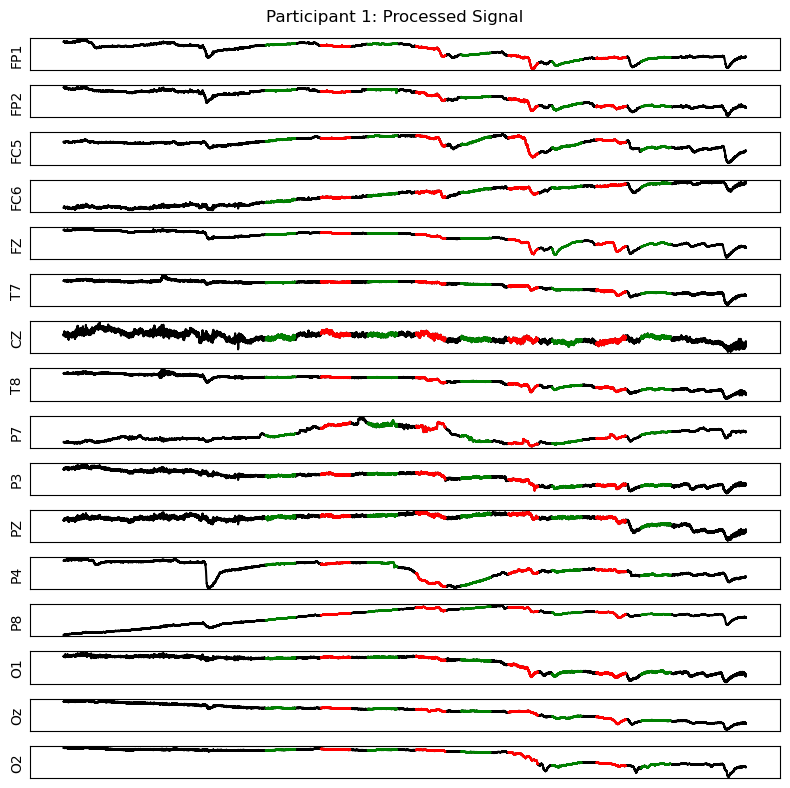

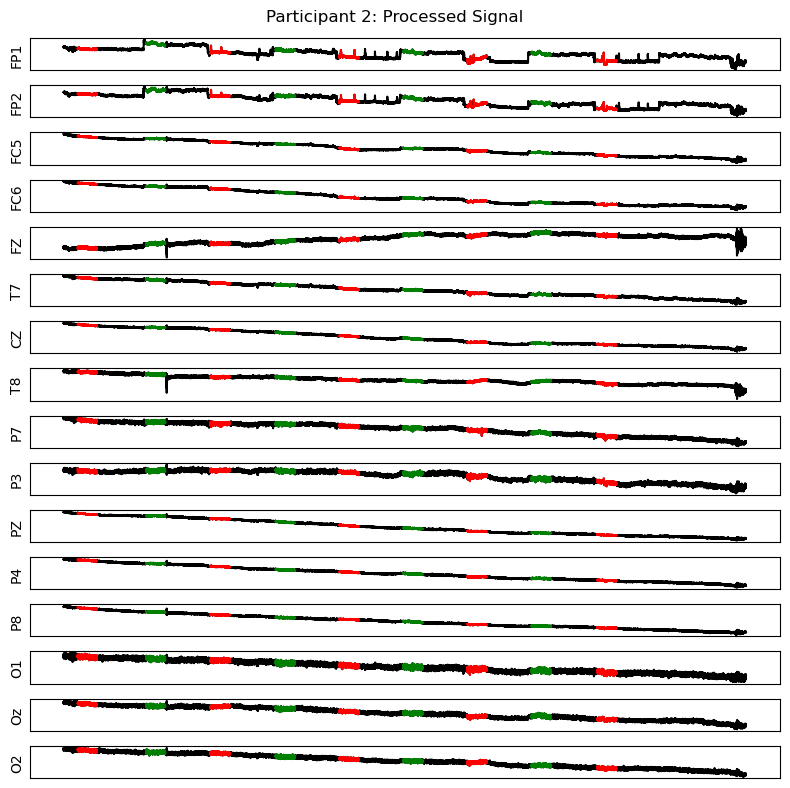

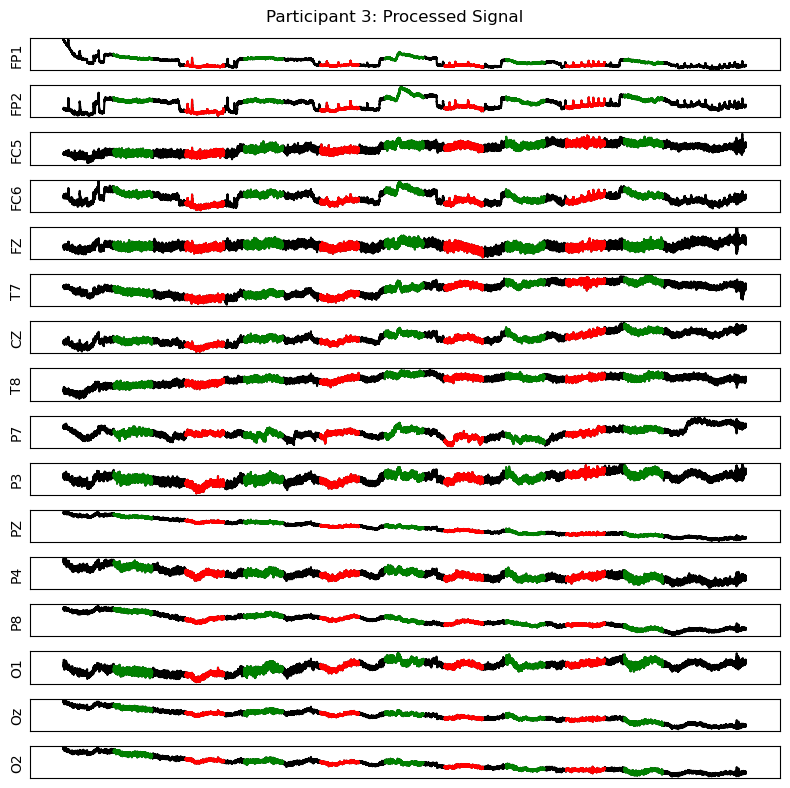

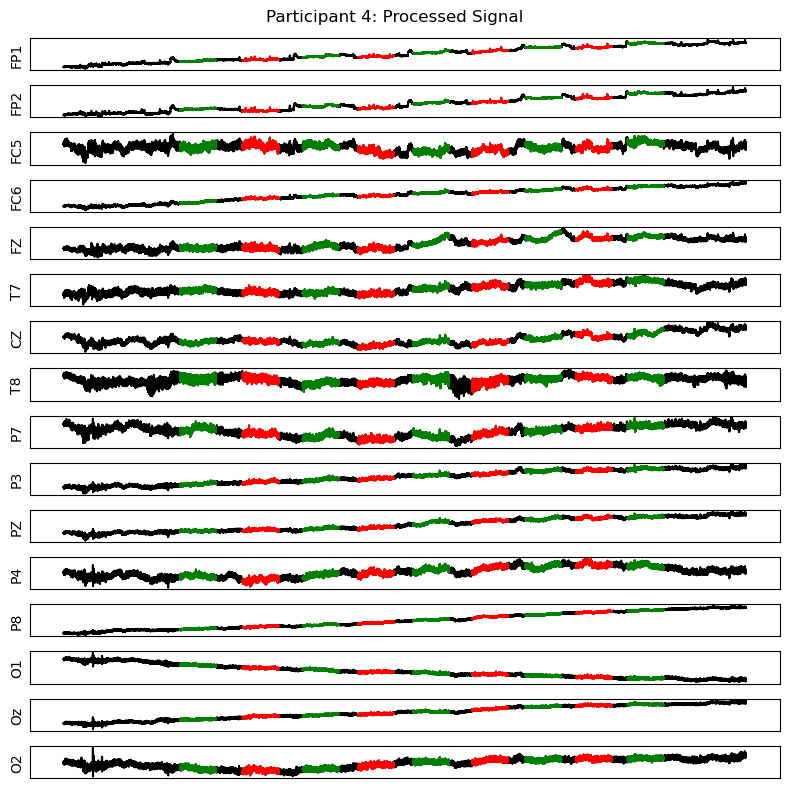

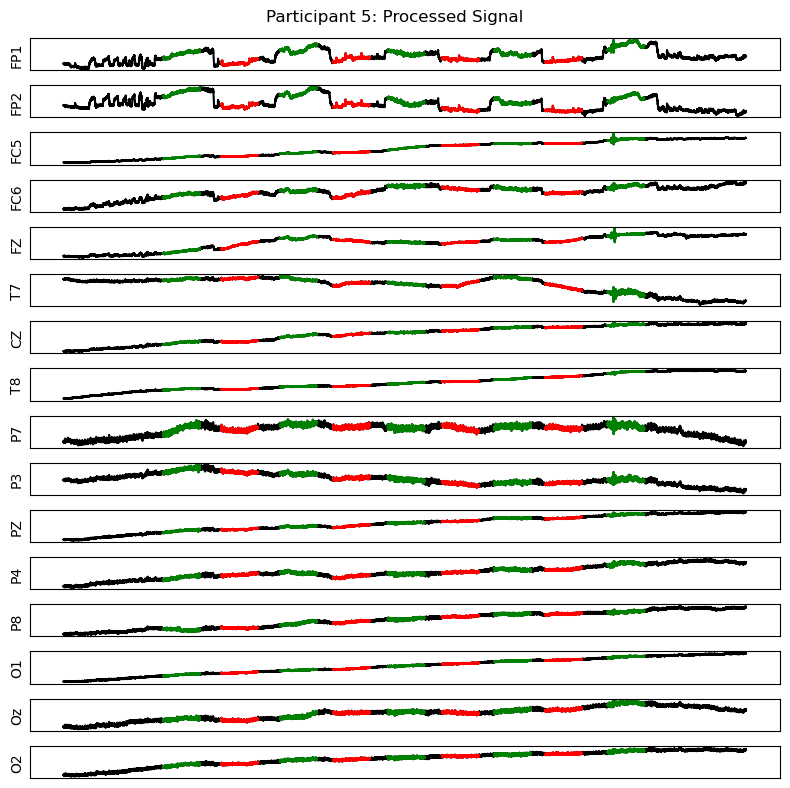

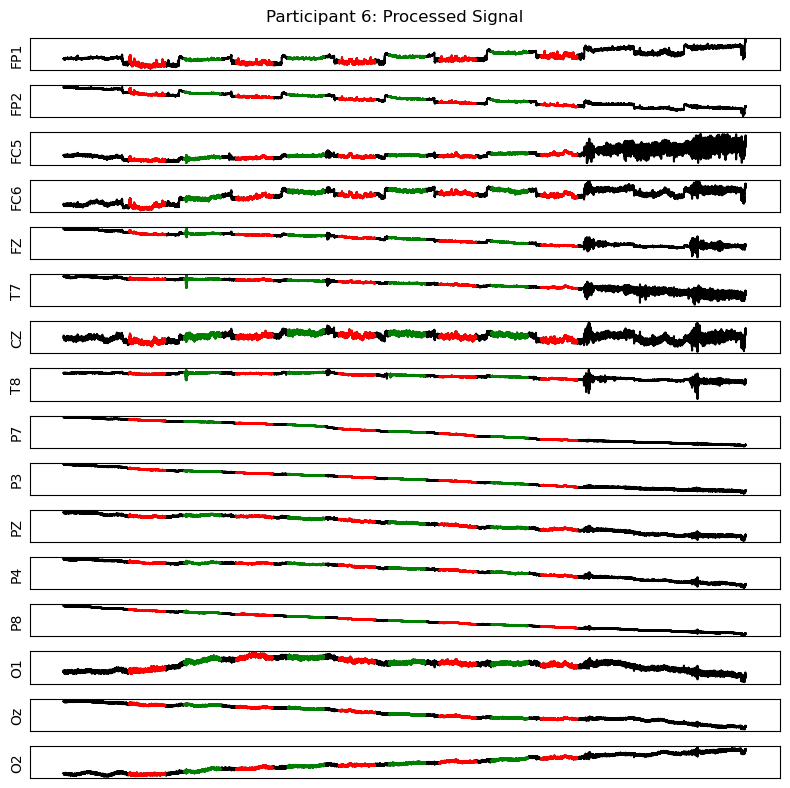

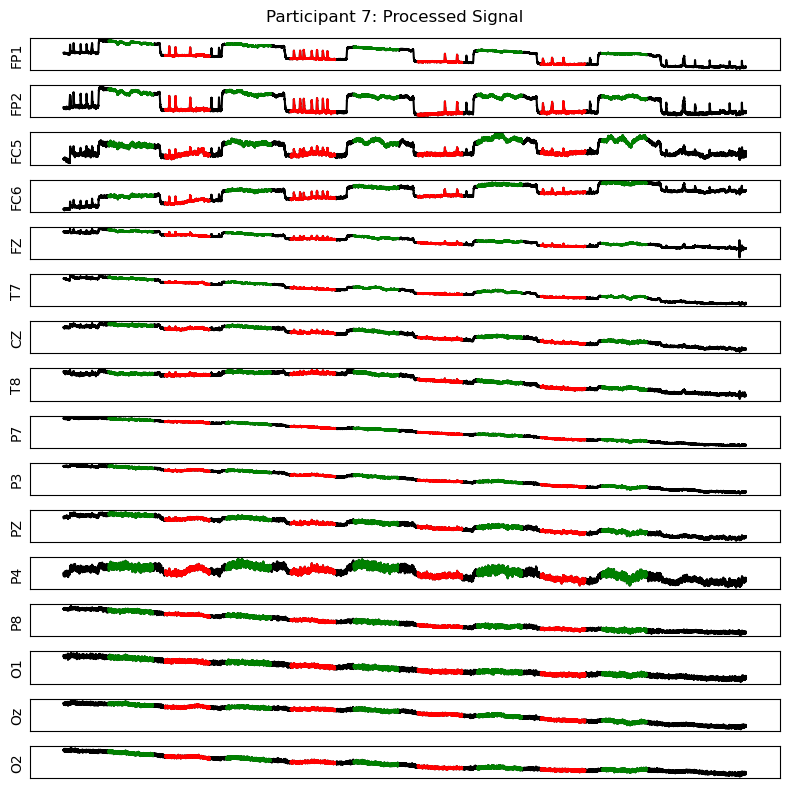

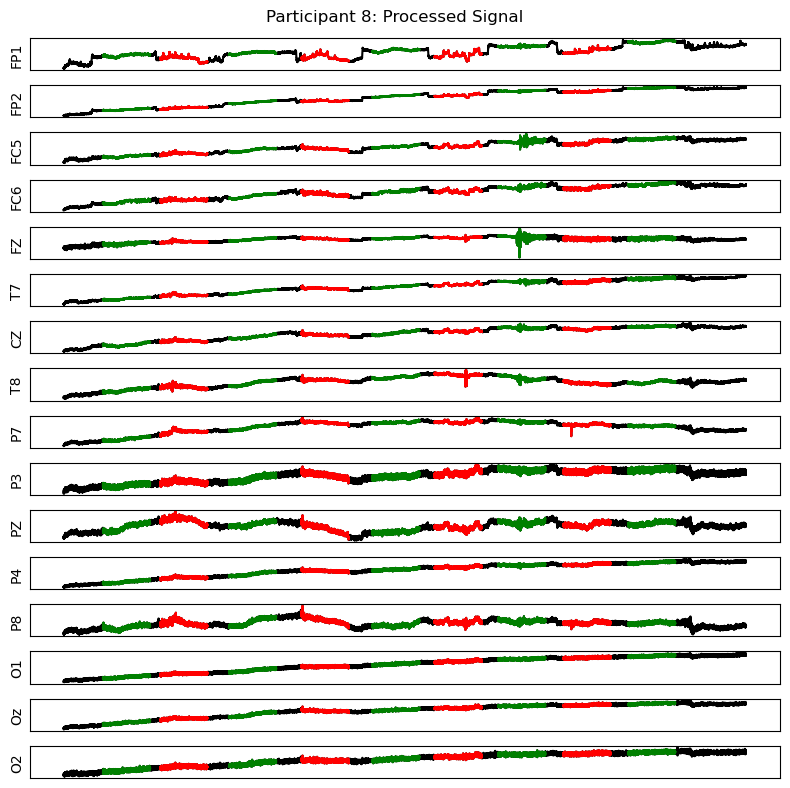

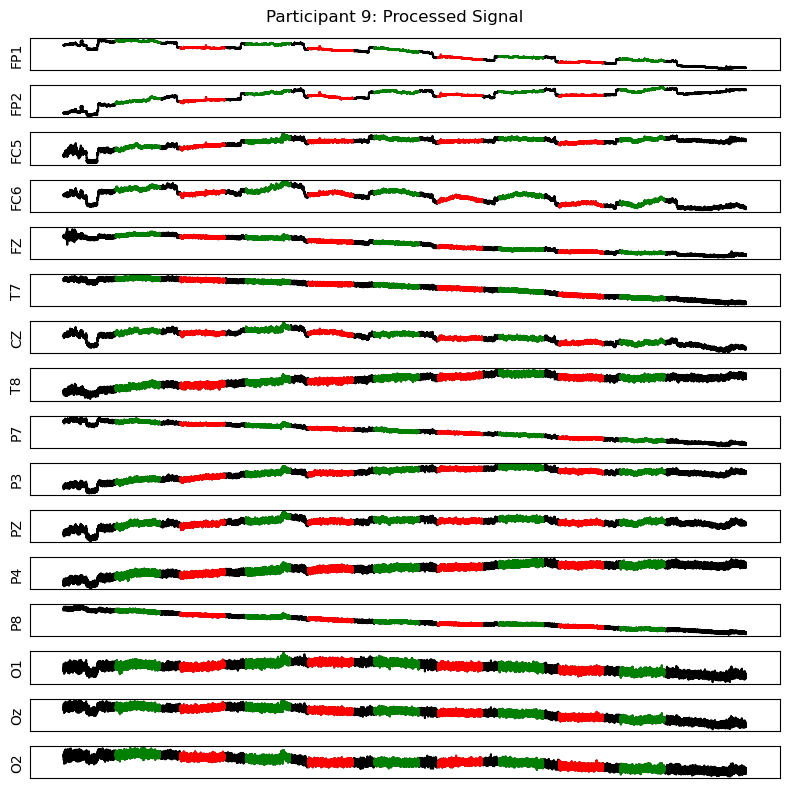

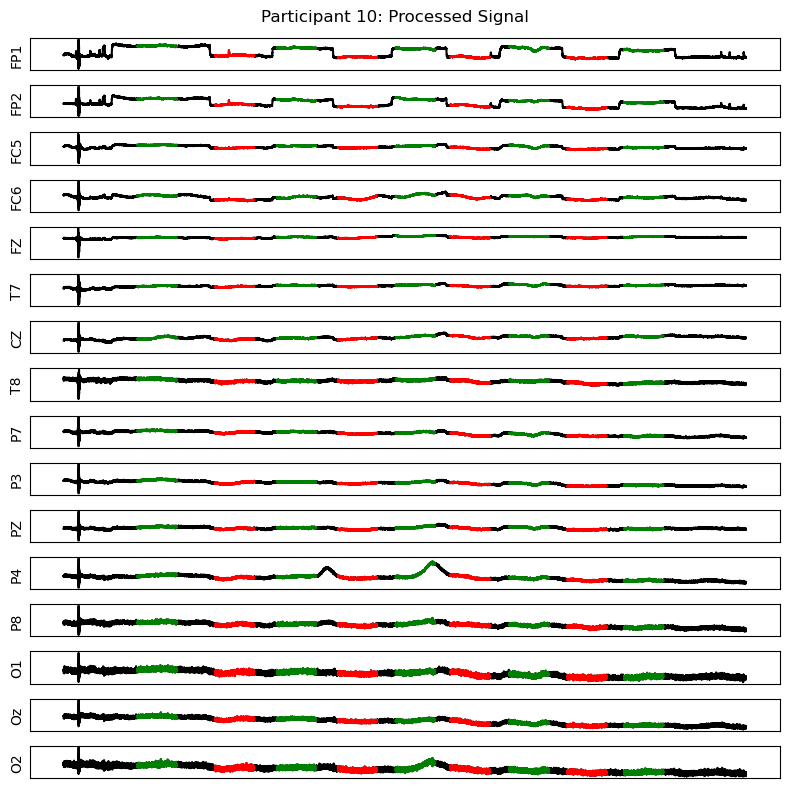

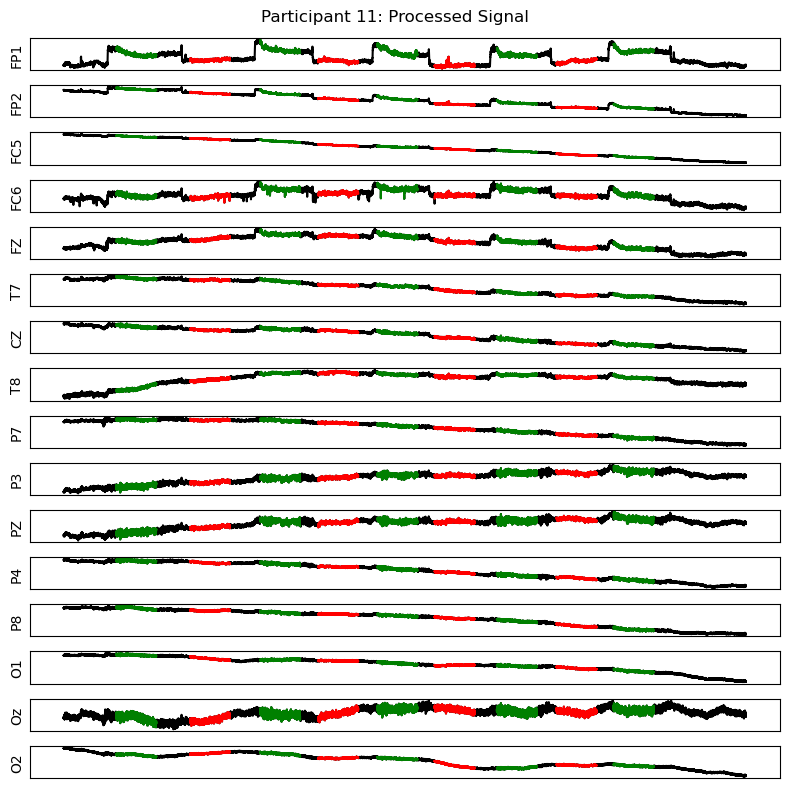

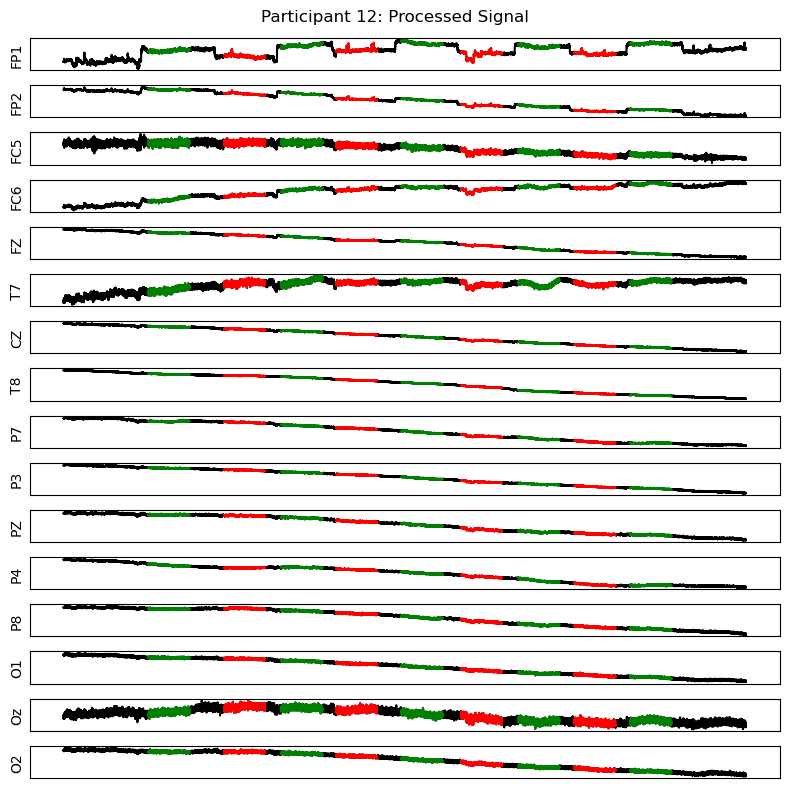

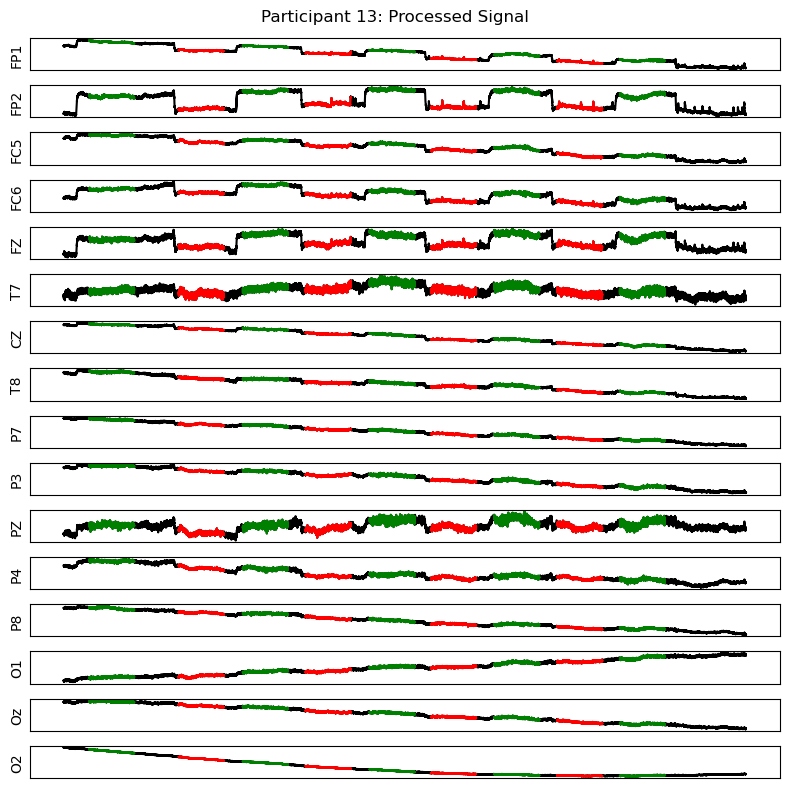

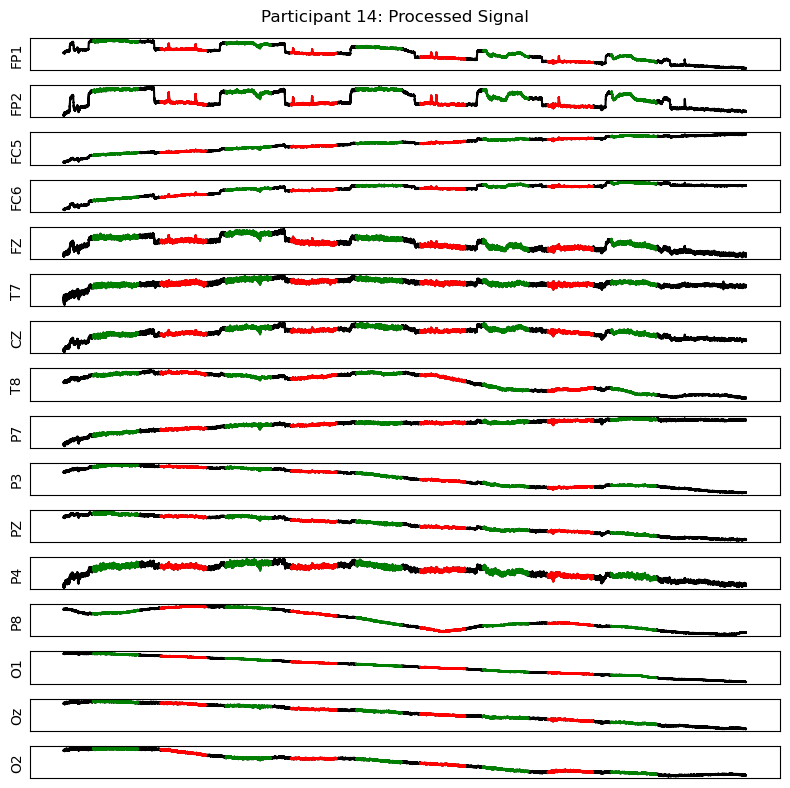

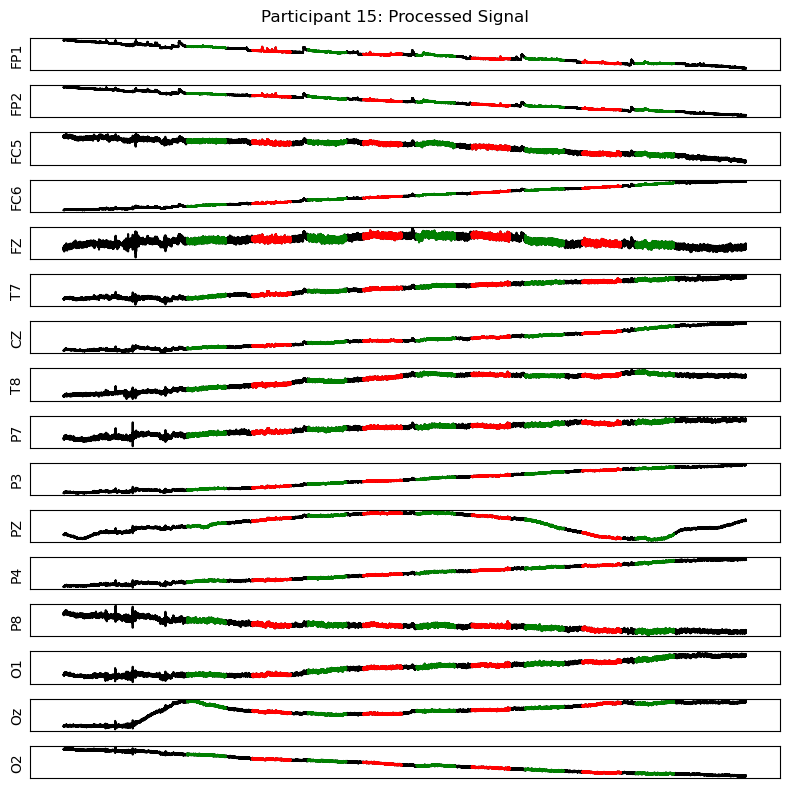

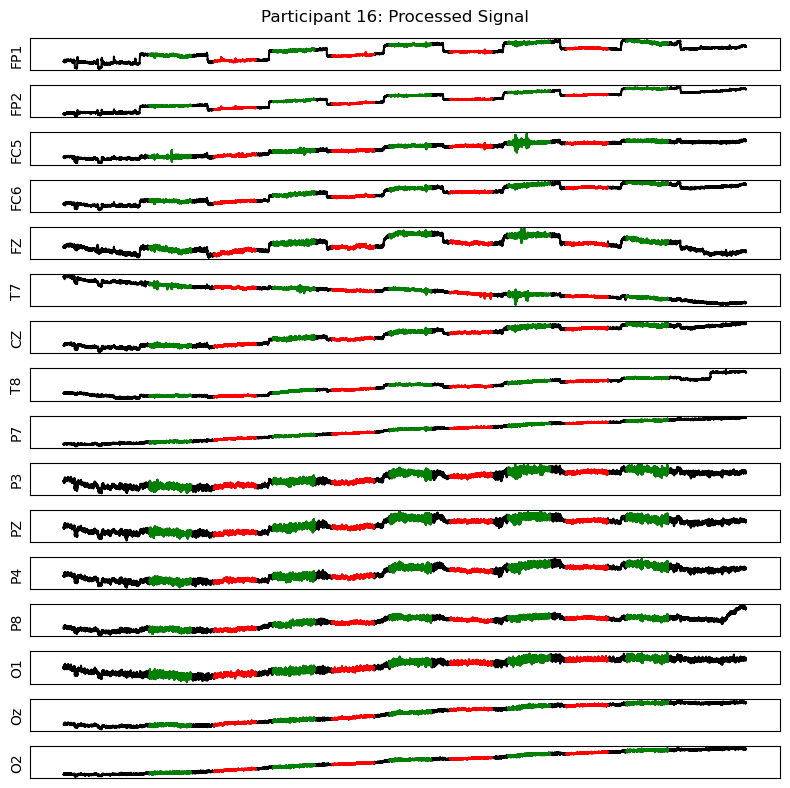

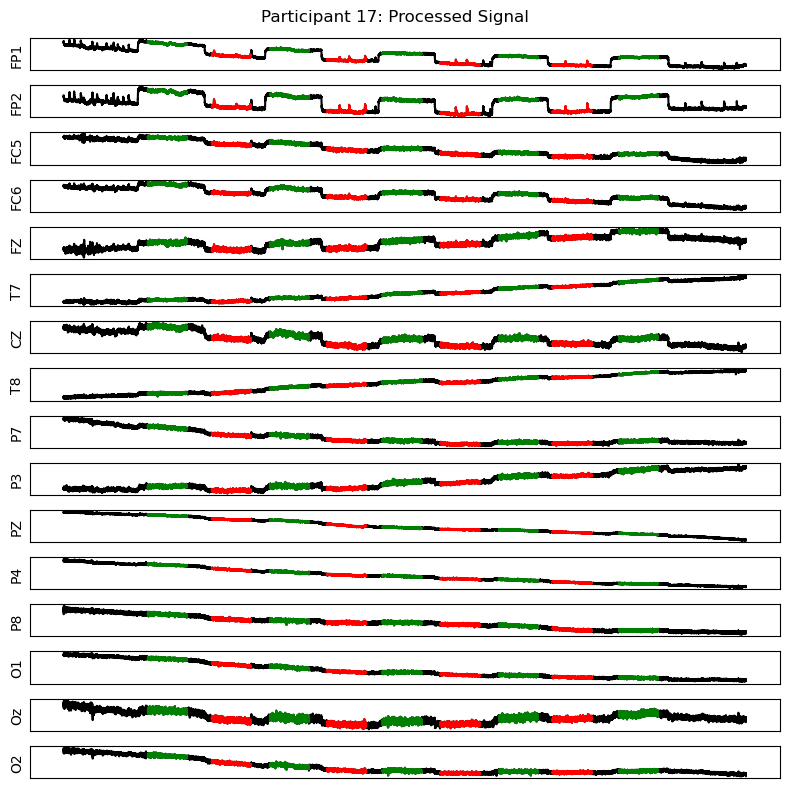

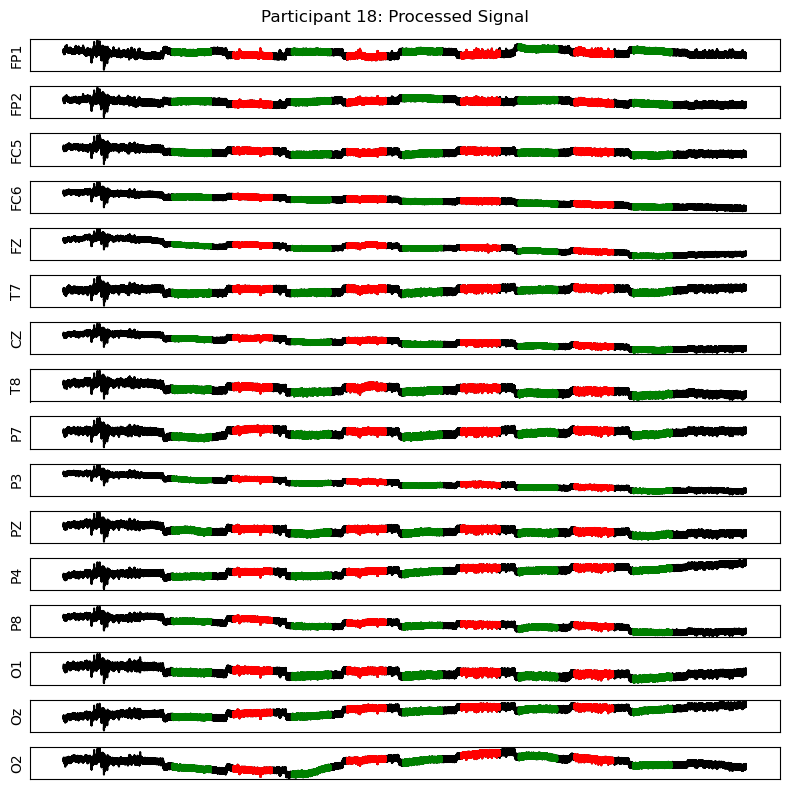

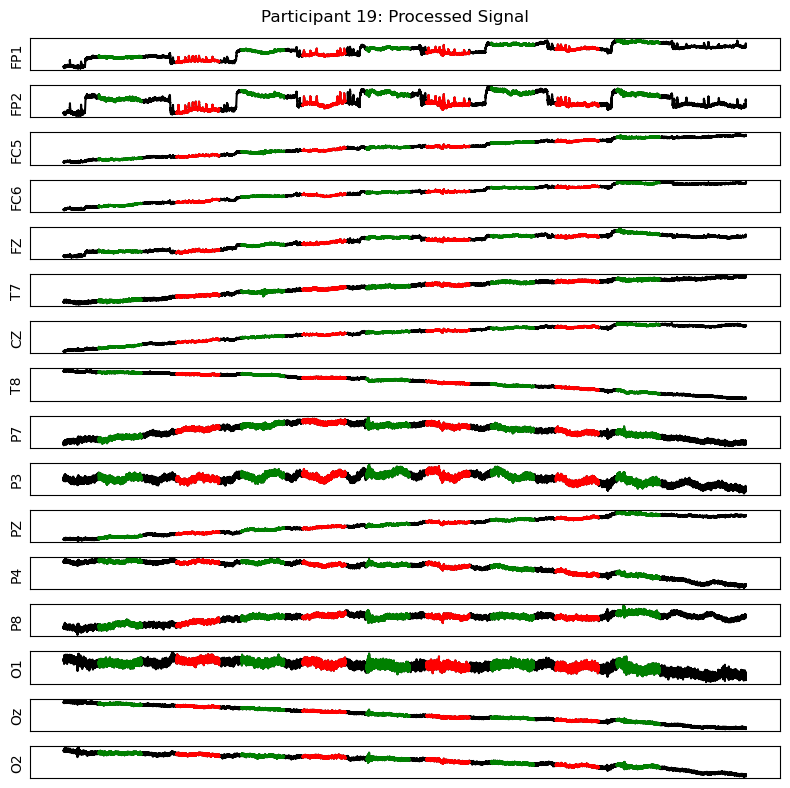

In [25]:
for i,f in enumerate(files):
    t, signal, section_num, class_bool, p_num = extract_segments(f)
    title_text = "Participant {}: Processed Signal".format(i+1)
    plot_all(f, title_text, "original_subject{}.png".format(i+1))
    # plot_signal(section_num, t, signal, class_bool, title_text, "subject_{}.png".format(i+1))